In [ ]:
#
# Copyright 2018-2019 IBM Corp. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Human Pose Estimation Example
In this example, we show how the MAX-Human-Pose-Estimator model can be used to detect and visualize the human poses from an image.

## Contents of this demo
We first visualize the test image and pass it through the MAX-Human-Pose-Estimator model to get all the human poses (a group of lines for each person in a JSON format). We then visualize the detected poses to verify that the model worked as intended. 

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import requests
import json

input_img_file = 'Pilots.jpg'
org_img = cv2.imread(input_img_file)[:,:,::-1]

## Visualize the test image

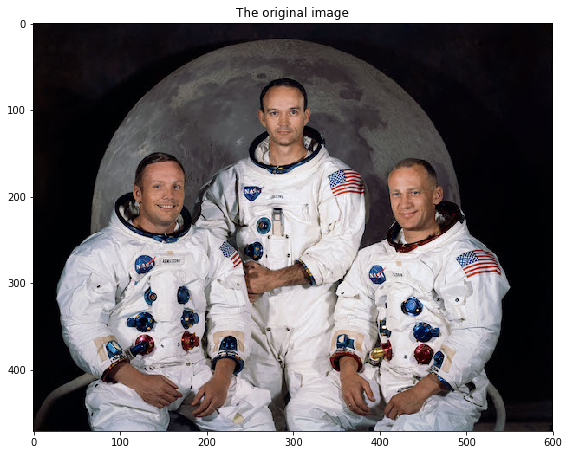

In [2]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.title("The original image")
plt.imshow(org_img)
plt.show()

## Detect all human poses from the test image

In [3]:
url = 'http://localhost:5000/model/predict'

# Submit the pose detection request by calling the rest API
def get_pose(input_img):
    """
    Takes in input image file path and detects poses.
    """
    files = {'file': ('image.jpg',open(input_img,'rb'), 'images/jpeg')}
    result = requests.post(url, files=files).json()
    
    return result

In [4]:
# Run the pose detection and print out the JSON result
preds = get_pose(input_img_file)
print(json.dumps(preds, indent=2))

{
  "status": "ok",
  "predictions": [
    {
      "human_id": 0,
      "pose_lines": [
        {
          "line": [
            444,
            269,
            392,
            269
          ]
        },
        {
          "line": [
            444,
            269,
            503,
            274
          ]
        },
        {
          "line": [
            392,
            269,
            367,
            330
          ]
        },
        {
          "line": [
            367,
            330,
            364,
            392
          ]
        },
        {
          "line": [
            503,
            274,
            511,
            348
          ]
        },
        {
          "line": [
            511,
            348,
            469,
            399
          ]
        },
        {
          "line": [
            444,
            269,
            397,
            410
          ]
        },
        {
          "line": [
            444,
            269,
        

## Visualize the detected poses

In [5]:
# Define the colors for different human body parts.
CocoColors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], 
              [170, 255, 0], [85, 255, 0], [0, 255, 0], [0, 255, 85], 
              [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], 
              [0, 0, 255], [85, 0, 255], [170, 0, 255], [255, 0, 255], 
              [255, 0, 170], [255, 0, 85]]

# Visualize the detected human poses on the image. The returned JSON result 
# contains the pose lines for each person in the input image. Each 
# person may have multiple pose lines. Each pose line contains four coordinates 
# for the start and end points as [x1, y1, x2, y2]. The `cv2.line(img, (x1, y1), 
# (x2, y2), color, thickness)` function is utilized to visualize the detected
# pose lines.
def draw_pose(preds, img):
    humans = preds['predictions']
    for human in humans:
        pose_lines = human['pose_lines']
        for i in range(len(pose_lines)):
            line = pose_lines[i]['line']
            cv2.line(img, (line[0], line[1]), (line[2], line[3]), CocoColors[i], 3)        
            

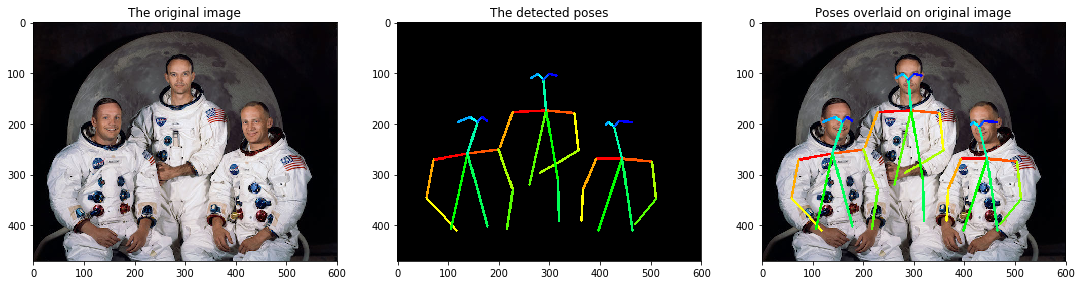

In [6]:
# Visualize the detected poses overlaid on the original image.
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

plt.subplot(1, 3, 1)
plt.imshow(org_img)
plt.title("The original image")

pose_img = np.zeros(org_img.shape, dtype=np.uint8)
draw_pose(preds, pose_img)
plt.subplot(1, 3, 2)
plt.imshow(pose_img)
plt.title("The detected poses")

overlaid_img = org_img.copy()
draw_pose(preds, overlaid_img)
plt.subplot(1, 3, 3)
plt.imshow(overlaid_img)
plt.title("Poses overlaid on original image")

plt.show()